In [198]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

<h1>Data Exploration</h1>

<h2>Data Cleaning</h2>

In [199]:
pd.set_option('display.max_columns', None)

In [200]:
df = pd.read_excel(r'C:\Users\Rohit Varre\Desktop\MliS\ML lab\Assignment 2\trainDataset.xls')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


In [202]:
df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             400 non-null    object 
 1   pCR (outcome)                  400 non-null    int64  
 2   RelapseFreeSurvival (outcome)  400 non-null    float64
 3   Age                            400 non-null    float64
 4   ER                             400 non-null    int64  
 5   PgR                            400 non-null    int64  
 6   HER2                           400 non-null    int64  
 7   TrippleNegative                400 non-null    int64  
 8   ChemoGrade                     400 non-null    int64  
 9   Proliferation                  400 non-null    int64  
 10  HistologyType                  400 non-null    int64  
 11  LNStatus                       400 non-null    int64  
 12  TumourStage                    400 non-null    int

In [203]:
# Dropping and rearranging columns
df.drop(['pCR (outcome)'],axis = 1, inplace = True)
cols = list(df.columns)
cols[2],cols[11] = cols[11],cols[2]
temp = cols[1]
cols.remove(temp)
cols.append(temp)
df = df[cols]

In [204]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2,0,0,0,1,3,3,1,1,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,

<h2>Treating null values</h2>

In [205]:
# The number of null values in a column
null = []
for i in df.columns:
    if 999 in df[i].unique():
        check = df[i].value_counts()[999]
        print(i,check)
        null.append(i)

PgR 1
HER2 1
TrippleNegative 1
ChemoGrade 3
Proliferation 2
HistologyType 3
LNStatus 1


In [206]:
# Replacing the null values by mode as the null values are only in categorical features
sif = SimpleImputer(missing_values=999, strategy='mean')
sic = SimpleImputer(missing_values=999, strategy='median')
ID = df['ID']
out = df['RelapseFreeSurvival (outcome)']
cat_cols = df.columns[1:10]
float_cols = df.columns[10:-1]

In [207]:
#Imputing values for continuous data
sic.fit(df[cat_cols])
sif.fit(df[float_cols])

df_cats = pd.DataFrame(sic.transform(df[cat_cols]),columns=cat_cols)
df_floats = pd.DataFrame(sif.transform(df[float_cols]),columns=float_cols)

df = pd.concat([df_cats.reset_index(drop=True),df_floats.reset_index(drop=True)],axis=1)
df.insert(0,'ID',ID)
df['RelapseFreeSurvival (outcome)'] = out

In [208]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.67025

In [209]:
df.head()

,ID,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,RelapseFreeSurvival (outcome)
0,TRG002174,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.67025

In [210]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.43

<h2>Data Visualization</h2>

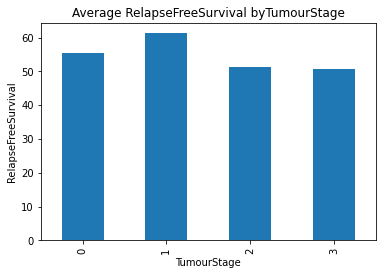

   TumourStage  RelapseFreeSurvival (outcome)
0          1.0                      55.452381
1          2.0                      61.232456
2          3.0                      51.190000
3          4.0                      50.708333


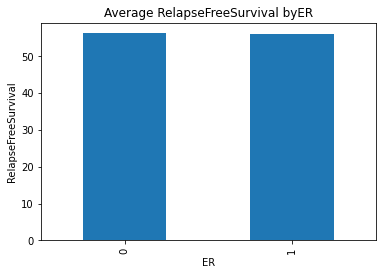

    ER  RelapseFreeSurvival (outcome)
0  0.0                      56.231431
1  1.0                      56.098765


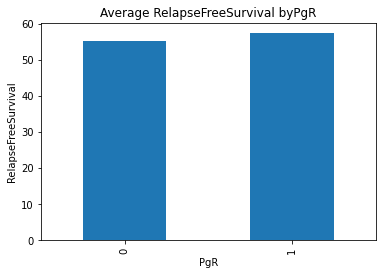

   PgR  RelapseFreeSurvival (outcome)
0  0.0                      55.341702
1  1.0                      57.374224


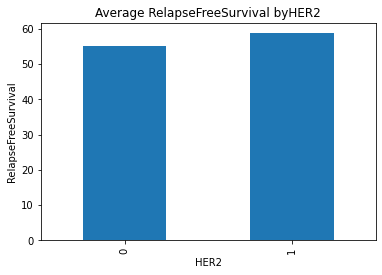

   HER2  RelapseFreeSurvival (outcome)
0   0.0                      54.998182
1   1.0                      58.715333


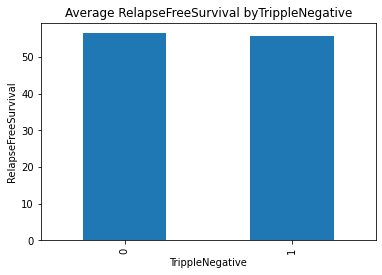

   TrippleNegative  RelapseFreeSurvival (outcome)
0              0.0                      56.418539
1              1.0                      55.640351


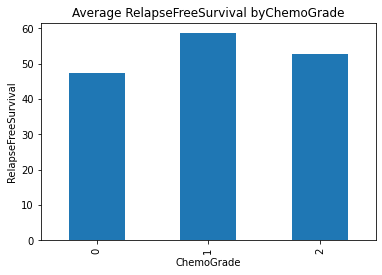

   ChemoGrade  RelapseFreeSurvival (outcome)
0         1.0                      47.333333
1         2.0                      58.578723
2         3.0                      52.780675


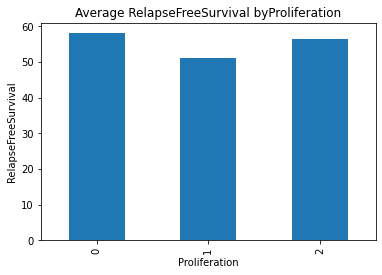

   Proliferation  RelapseFreeSurvival (outcome)
0            1.0                      58.039548
1            2.0                      51.194444
2            3.0                      56.415493


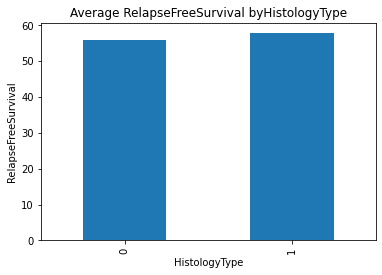

   HistologyType  RelapseFreeSurvival (outcome)
0            1.0                      55.894380
1            2.0                      57.790179


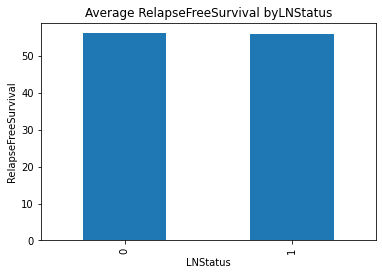

   LNStatus  RelapseFreeSurvival (outcome)
0       0.0                      56.188802
1       1.0                      56.133013


In [211]:
# Average RFS value with respect to various categorical features
check = pd.DataFrame
for i,col in enumerate(df.columns[1:10]):
    check = df.groupby(col,as_index=False)['RelapseFreeSurvival (outcome)'].mean()
    check['RelapseFreeSurvival (outcome)'].plot(kind='bar')
    plt.title('Average RelapseFreeSurvival by' + col)
    plt.xlabel(col)
    plt.ylabel("RelapseFreeSurvival")
    plt.show()
    print(check)

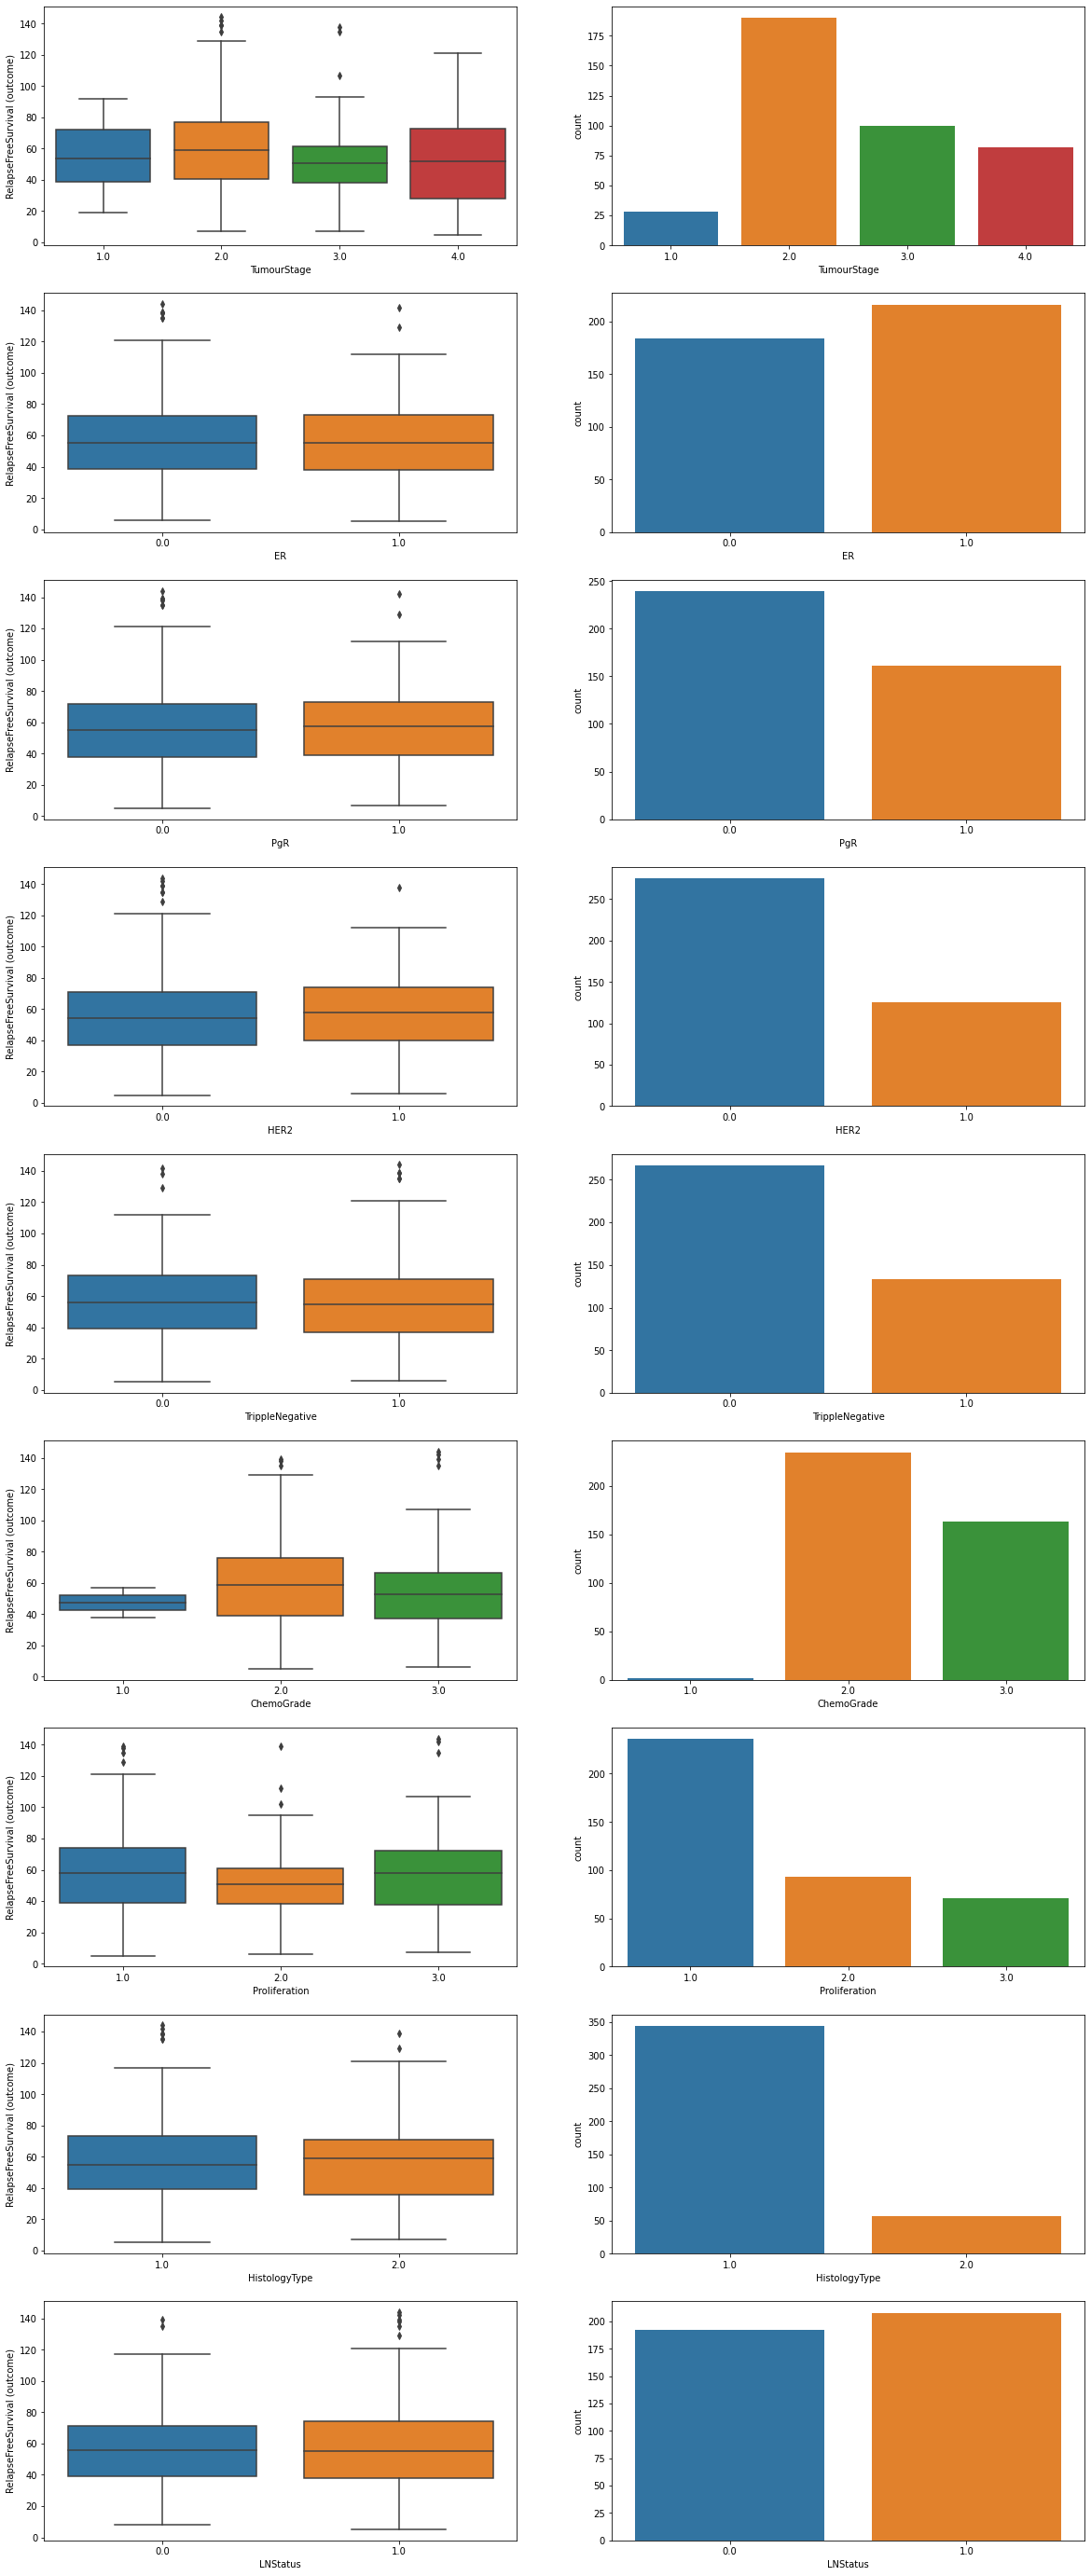

In [212]:
# The distribuion of RFS with respect to categorical features and the frequency of classes
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(20,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
for i, col in enumerate(df.columns[1:10]):
    sns.boxplot(y='RelapseFreeSurvival (outcome)', x=col, data = df, ax=axes[i][0])
    sns.countplot(x=col, data = df, ax=axes[i][1])

In [213]:
# fig, ax = plt.subplots(nrows=20, ncols=6, figsize=(300,560))
# fig.subplots_adjust(hspace =.2, wspace=.2)
# ax = ax.ravel()
# for i, col in enumerate(X.columns[1:]):
#     ax[i].plot(X[col],y,'or',markersize = 15)

<h1>Feature Selection</h1>

<h2>Correlation Matrix</h2>

<h3>Kendall</h3>

In [214]:
# Kendall's correlation on the continous features
corrMat_kendall = df.iloc[:,10:].corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [215]:
# Choosing significant features with 0.05 as cutoff
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.05) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.05)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-215-11ed2f5fb77e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


<h3>Pearson</h3>

In [216]:
# Pearson's correlation on the continous features
corrMatt = df.iloc[:,10:].corr()
corrMat = pd.DataFrame(corrMatt)
corrMat.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr = corrMat['RelapseFreeSurvival (outcome)']
corr = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr.reset_index(inplace=True)
corr.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


In [217]:
# Choosing significant features with 0.05 as cutoff
corr_sig = corr[(corr['RelapseFreeSurvival (outcome)']>0.05) | (corr['RelapseFreeSurvival (outcome)']<-0.05)]
corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
corr_sig.head()

<ipython-input-217-4cb028e0df97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,original_glszm_SizeZoneNonUniformityNormalized,0.084781
2,original_shape_Sphericity,0.079465
3,original_ngtdm_Coarseness,0.061385
4,original_glszm_ZonePercentage,0.061216


<h3>Plotting significant features with Kendall's correlation</h3>

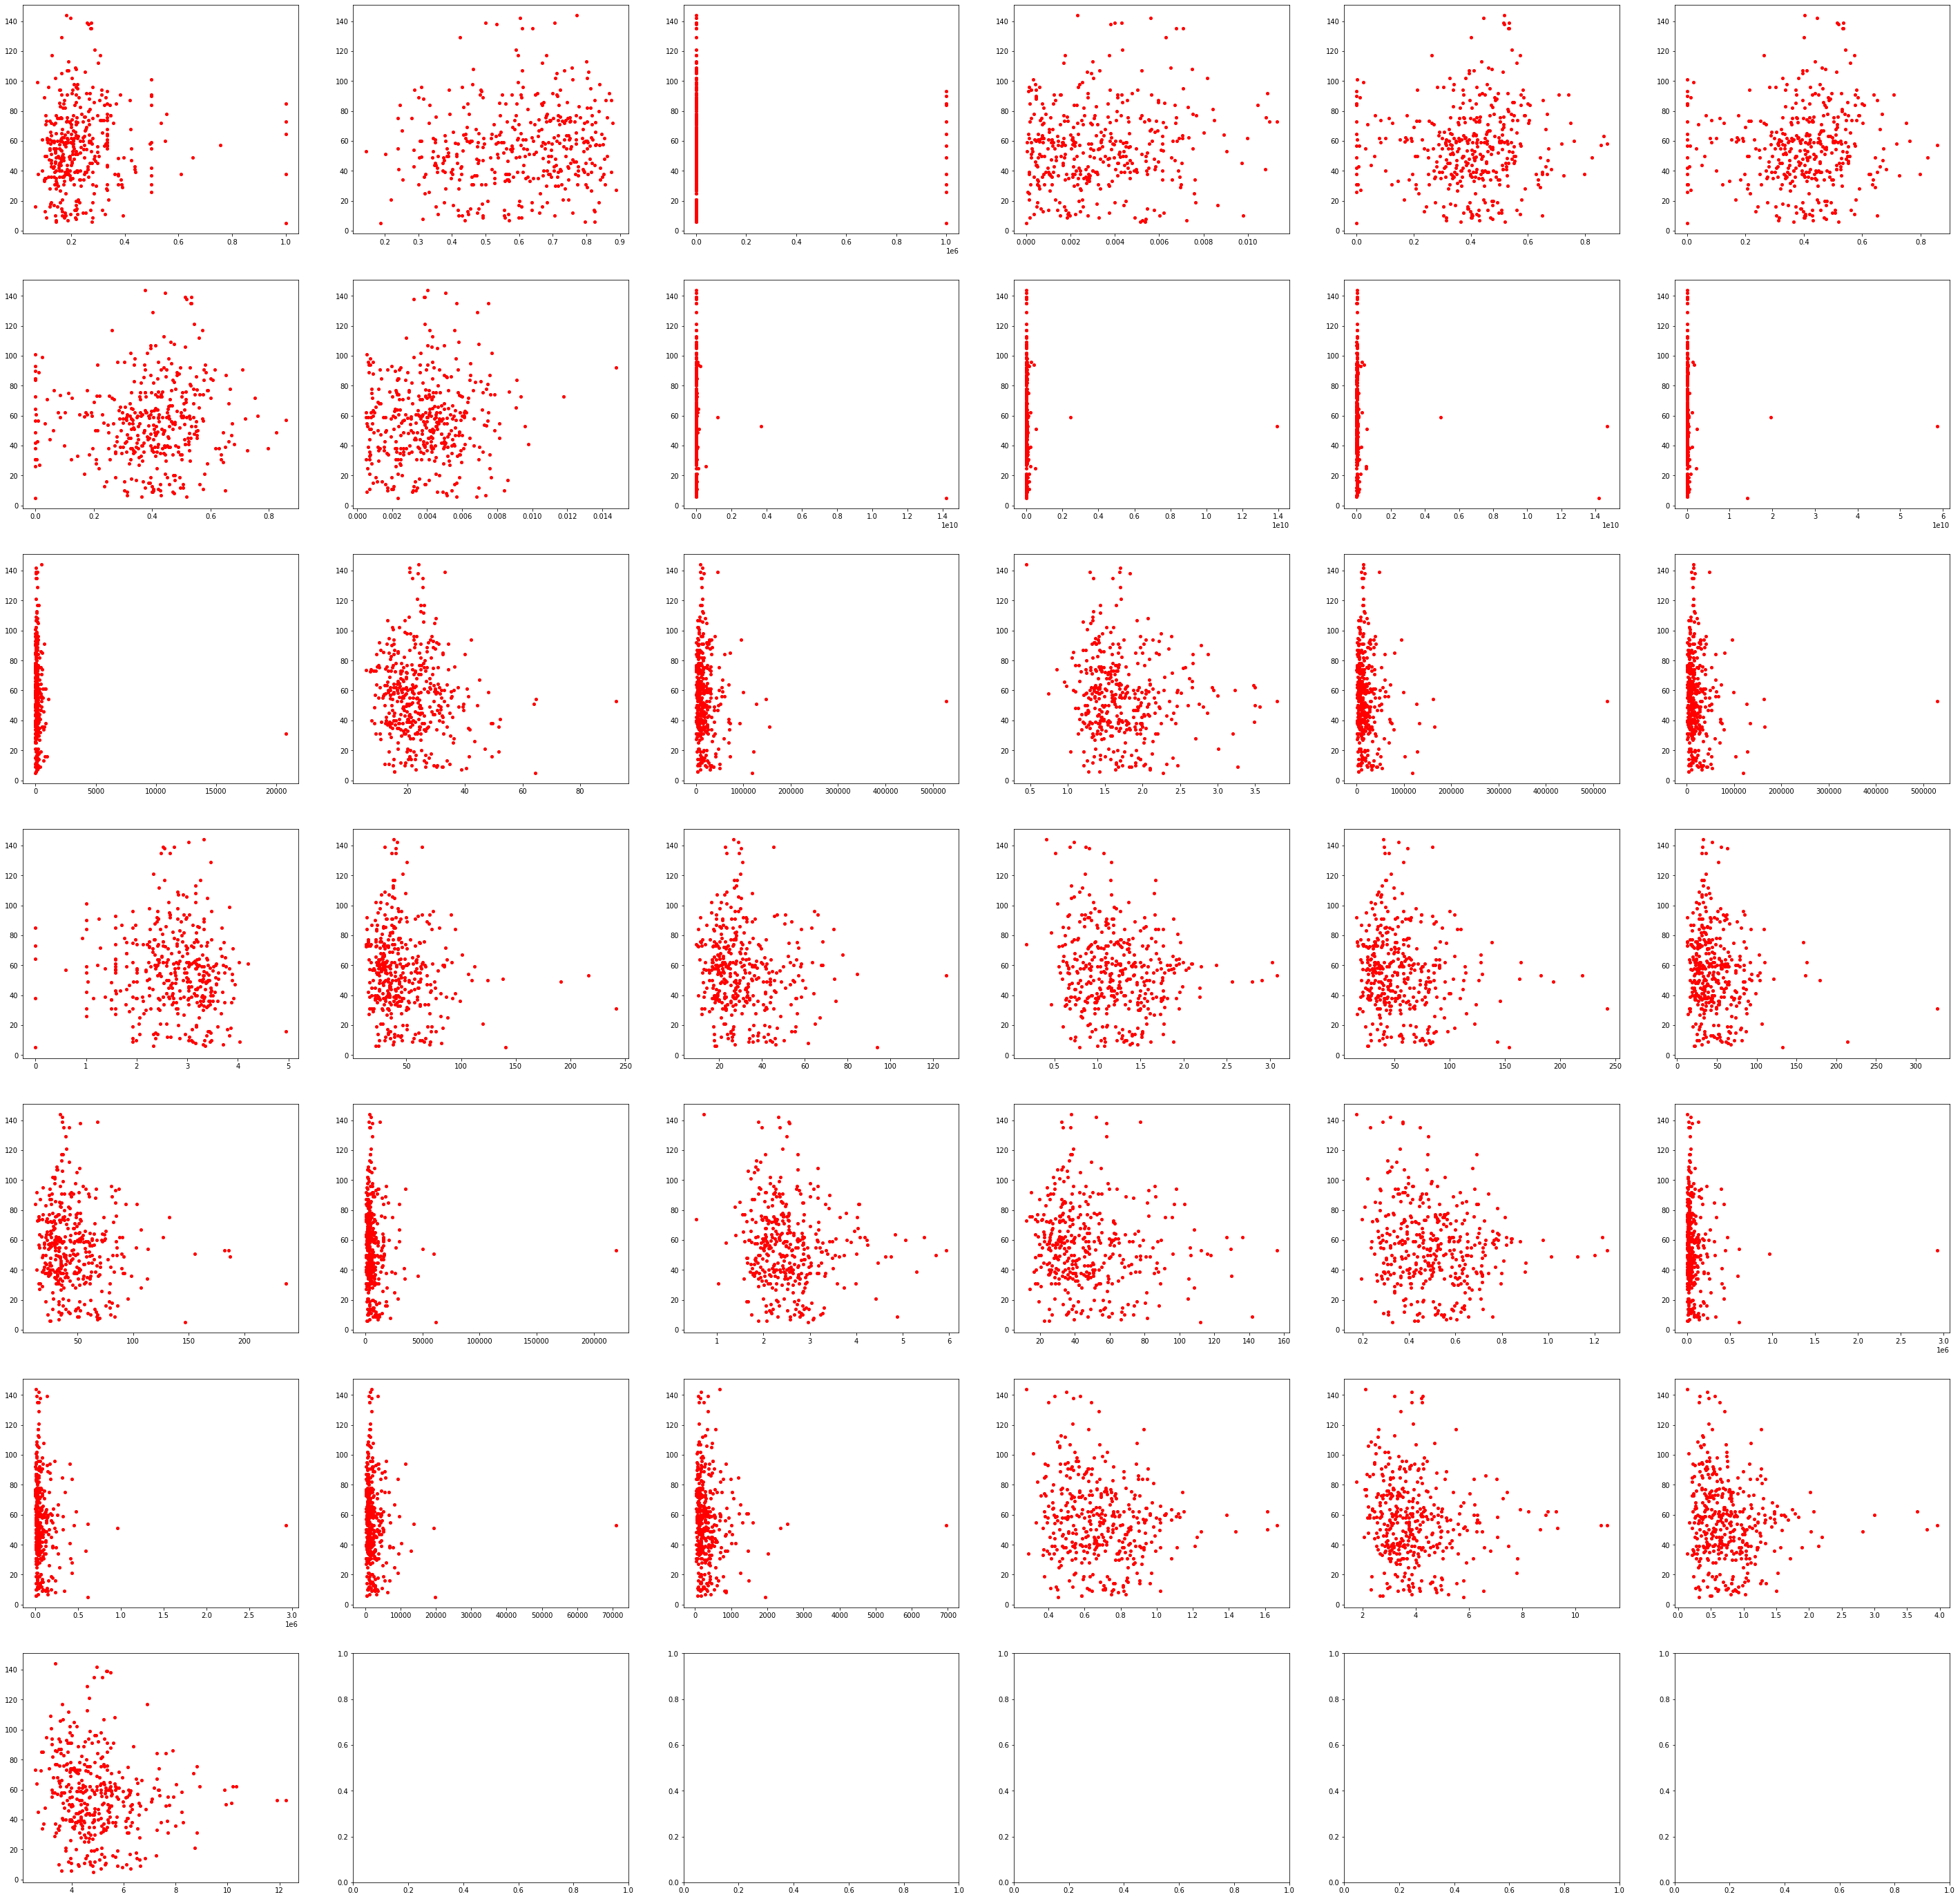

In [218]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

<h3>Plotting significant features with Pearson's correlation</h3>

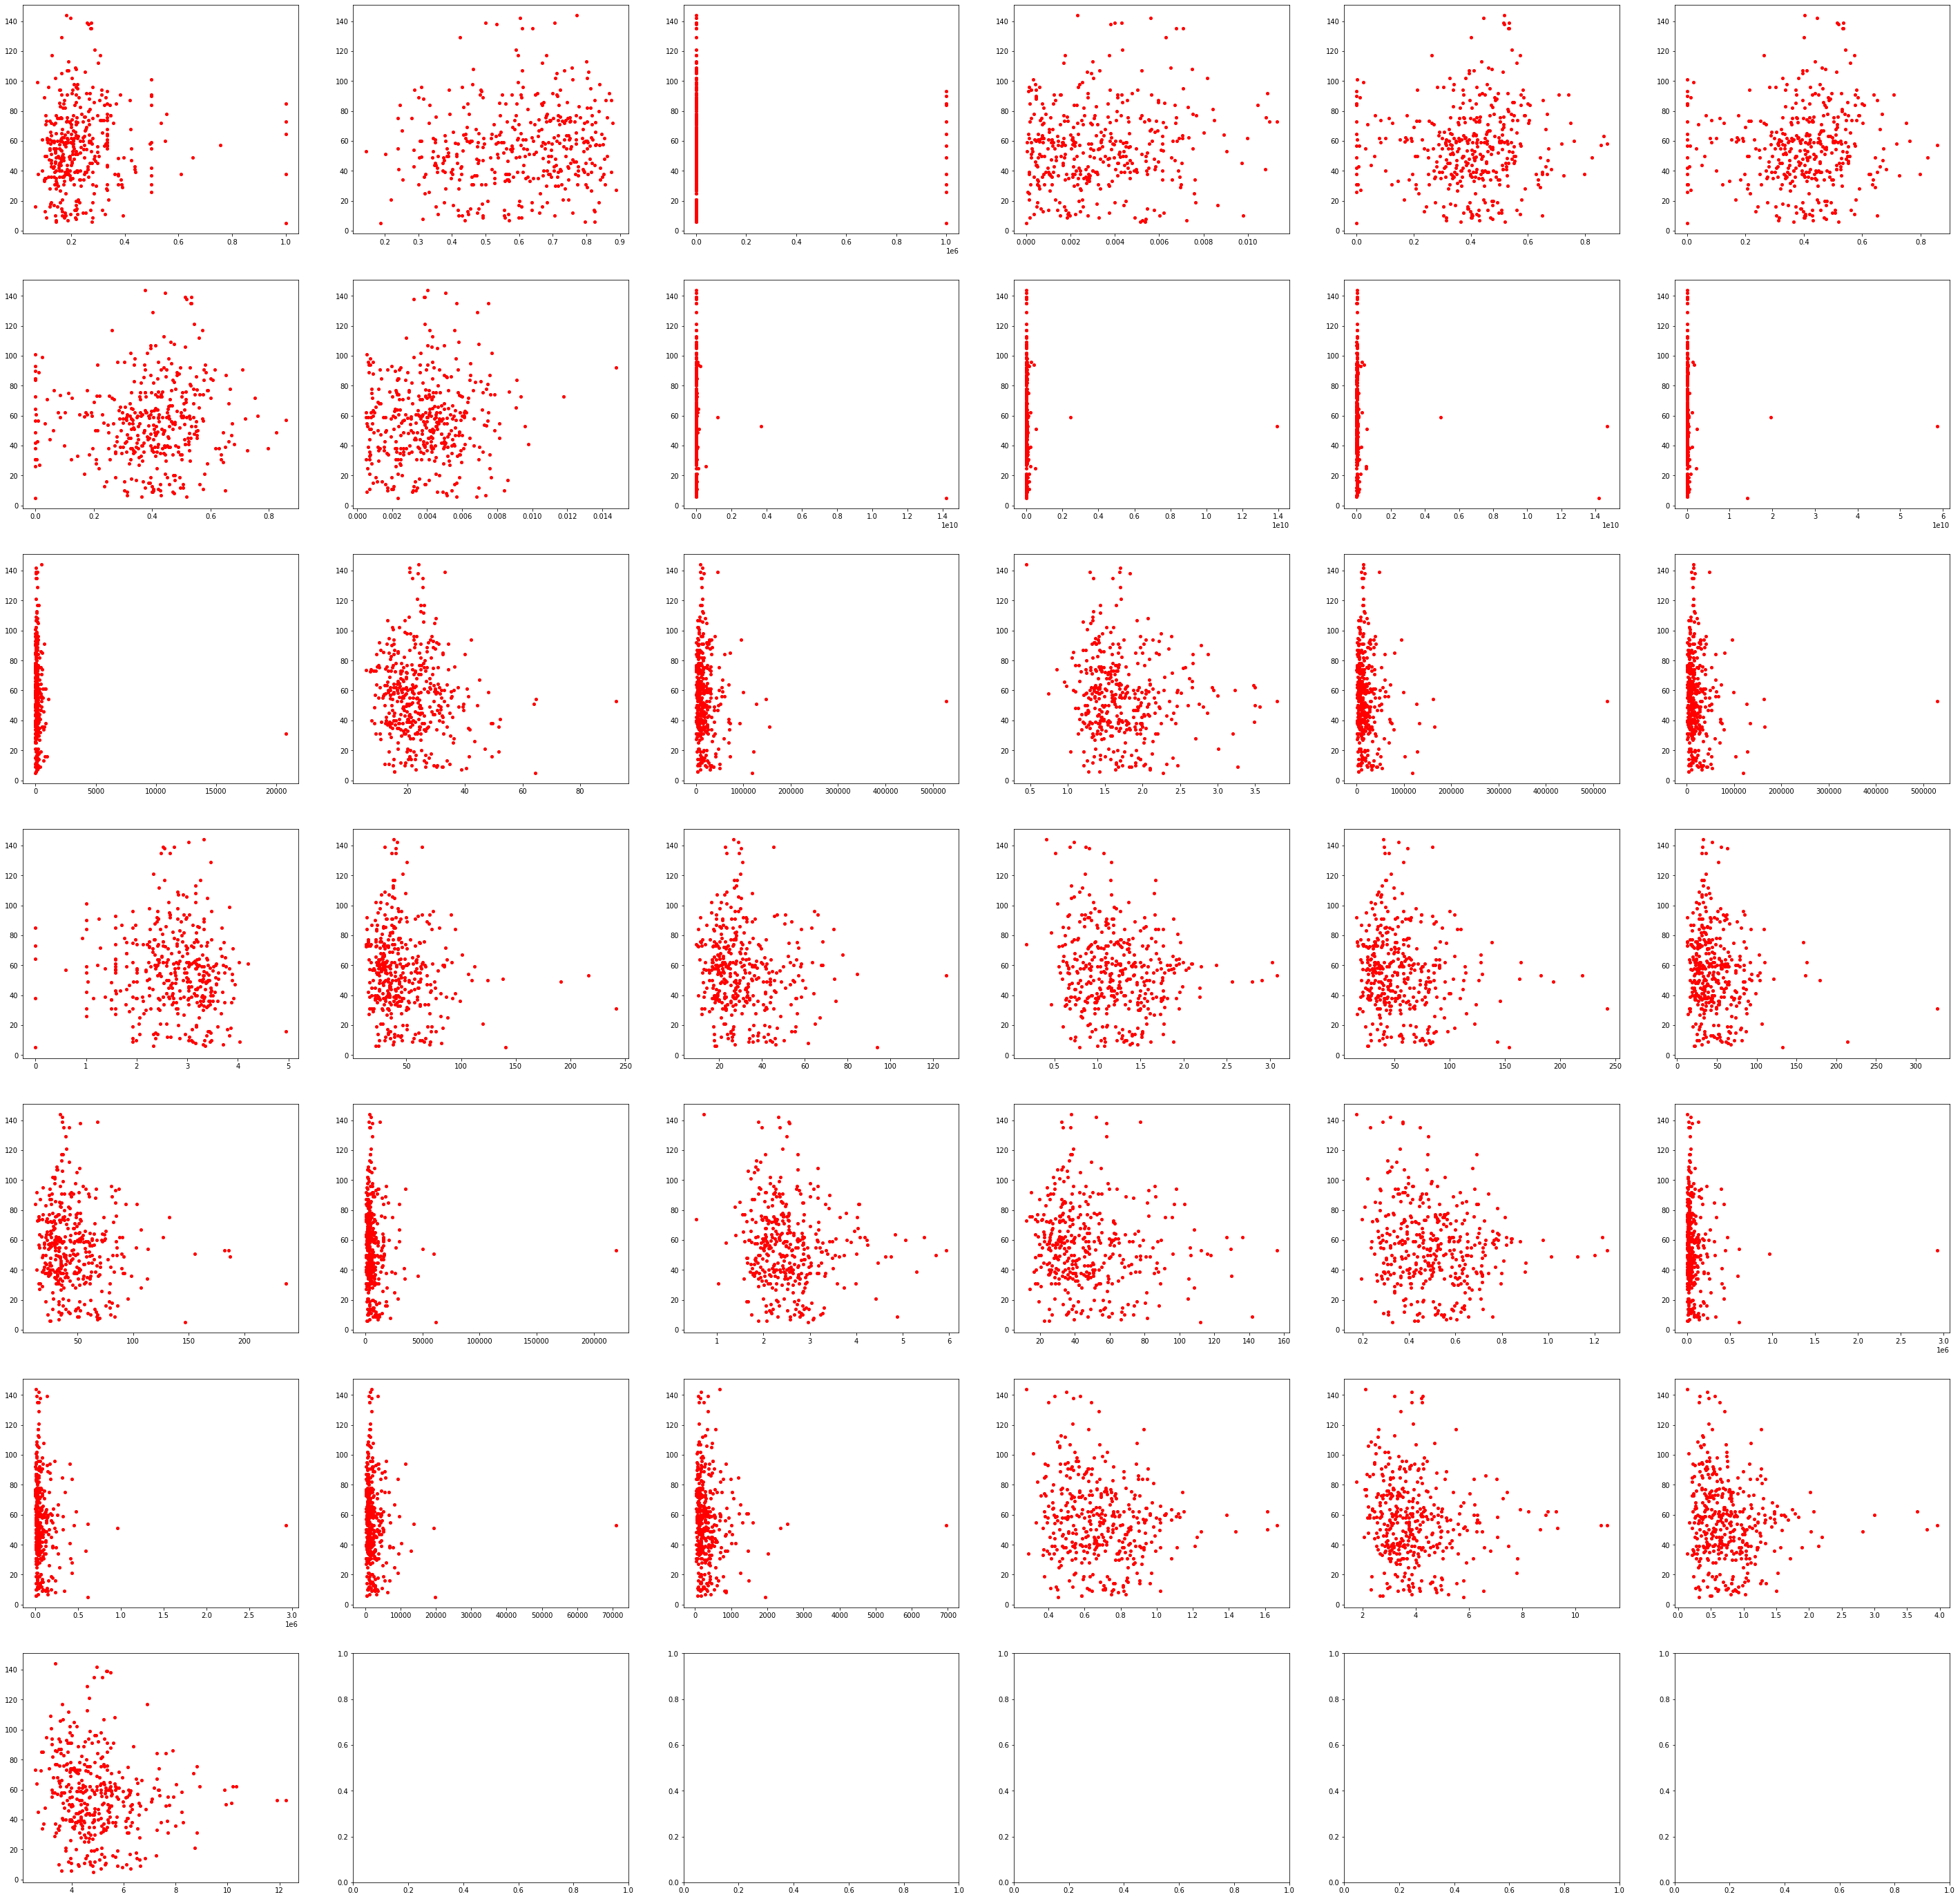

In [219]:
fig, ax = plt.subplots(nrows=len(corr_sig['index'])//6 + 1, ncols=6, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(corr_sig['index'][1:]):
    ax[i].plot(X[col],y,'or',markersize = 4)

<h1>Dimensionality Reduction</h1>

In [220]:
y = pd.DataFrame(df['RelapseFreeSurvival (outcome)'])
X = df.drop(['RelapseFreeSurvival (outcome)','ID'],axis = 1)
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.43

In [221]:
X_img = X.iloc[:,10:]
X_img.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.438760,0.184265,0.407895,0.184265,0.685680,0.149585,0.907867,0.907867,0.963147,0.938578,-0.149786,0.425720,0.184265,1.806982,0.538903,1

In [222]:
# TSNE dimensionality reduction
from sklearn.manifold import TSNE
X_img = TSNE(n_components=30,method='exact').fit_transform(X_img)
print(X.shape,y.shape)

C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 117) (400, 1)


In [223]:
X_img = pd.DataFrame(X_img)
X_img.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.033800,0.155364,-0.057043,-0.287912,-0.179605,-0.040136,-0.061571,-0.071854,0.099400,-0.024337,-0.136618,0.161037,-0.043133,0.169760,-0.065693,0.020031,-0.039261,-0.045869,-0.152539,-0.071147,-0.034908,-0.042447,0.017116,-0.018643,-0.120326,-0.051477,-0.047229,-0.192103,0.182949,-0.235154
std,1.998313,3.203389,1.762416,3.747906,3.684625,3.385774,1.708963,3.016226,2.547138,2.526774,2.234687,3.745991,2.168718,2.530877,1.823694,1.685572,1.729890,3.064777,3.058275,2.229995,2.747372,2.110729,2.699032,3.482254,2.682247,2.864736,2.163147,3.798185,3.784426,3.716462
min,-8.041433,-8.817564,-8.688086,-59.351723,-57.301769,-54.316803,-13.085362,-45.357033,-10.101942,-37.451397,-27.596449,-23.919802,-19.985395,-5.549297,-20.795160,-15.416464,-10.217126,-32.340145,-37.191917,-28.963087,-21.580727,-21.841948,-38.775173,-45.352993,-43.457726,-24.134939,-26.032875,-62.638233,-15.977070,-64.690247
25%,-0.768839,-1.112743,-0.917841,-0.733363,-1.175222,-1.039465,-0.850602,-0.640558,-0.603942,-0.674410,-1.025666,-1.094551,-0.815116,-1.175612,-0.599439,-0.639862,-0.970207,-1.364531,-1.003810,-0.636970,-1.556504,-0.981818,-0.607677,-0.987785,-0.593157,-0.698244,-0.835523,-0.728378,-0.888142,-0.608597
50%,-0.041343,-0.040675,-0.064350,-0.093176,-0.078890,0.148874,-0.020179,-0.021267,-0.059108,0.059540,-0.021773,0.199696,0.077358,0.072063,-0.046538,-0.023305,-0.050773,0.003123,-0.019452,0.069818,0.142452,-0.007117,0.017857,-0.200292,-0.016463,0.021107,0.049359,0.080717,0.077818,0.025153
75%,0.672606,1.366029,0.960345,0.673993,1.238493,1.184820,0.671263,0.505615,0.556793,0.661035,0.951396,1.064785,0.985695,1.191620,0.656478,0.692074,0.773772,1.554868,0.990817,0.691869,1.770146,0.968009,0.767642,1.001626,0.558124,0.641349,0.994088,0.860052,0.830707,0.546691
max,28.051435,50.462528,10.892819,10.032054,13.201550,12.066046,6.579759,22.916319,37.156364,18.647409,5.231022,61.409325,18.504389,21.951118,4.648712,14.307795,7.695053,30.326527,9.527069,13.522698,13.093486,14.174102,13.587828,32.778034,13.531112,33.102165,6.172281,14.439746,64.979225,19.647808


In [224]:
X_img.insert(0,'RelapseFreeSurvival (outcome)',df['RelapseFreeSurvival (outcome)'])
X_img.head()

,RelapseFreeSurvival (outcome),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,144.0,0.510262,2.048391,1.810801,-1.439611,0.420787,1.692068,0.152526,0.160285,0.414829,3.715370,-1.212692,-1.993096,1.105722,-1.030683,-3.674705,0.142442,-0.802785,3.883110,-1.390497,1.590158,1.900476,-1.167215,0.496677,0.365357,0.786020,0.329489,1.029636,1.802014,-0.647845,0.550501
1,142.0,-1.710396,-0.883312,-0.396338,2.110950,-0.878898,1.315075,0.211316,-1.691109,-0.399572,1.158846,1.948234,-0.038647,1.059356,2.077708,0.005839,0.824135,2.175940,0.510518,-0.507287,1.353017,-0.046656,1.059790,-0.590334,-1.079954,0.399499,-0.429554,1.252946,0.145137,-1.647131,1.983931
2,135.0,-1.884467,-1.111117,-0.329256,-2.187834,-1.557937,0.694190,-1.931553,0.477946,0.775938,-1.925977,0.743952,-1.569072,-0.497790,-0.977399,-1.155004,0.563030,1.381253,2.742903,1.486852,-0.284285,-0.325267,-2.245661,-1.702631,-0.166046,0.607311,1.038856,-3.652861,0.279780,0.213403,-0.735703
3,12.0,-1.543851,2.210845,0.145219,0.986995,1.536382,0.689985,-0.347546,-0.044110,-2.055666,-0.128384,-0.816742,1.884985,0.878122,2.102780,-0.482774,-0.895144,-0.881689,-0.891698,-0.939528,-0.445171,2.110889,-0.685704,2.651096,4.193834,-0.029758,1.826057,-0.928477,0.177700,1.019780,0.456484
4,109.0,0.993049,-0.583017,-2.162575,-0.351454,-0.740354,3.911280,-0.949204,-0.645588,0.363191,0.411778,1.738586,-0.901126,-1.883229,-0.654005,-0.215254,1.322071,-1.030824,1.281623,4.840549,-1.031630,-1.365694,-0.243984,-0.234892,-1.194111,-0.387112,0.693615,-1.011041,-0.452468,0.403897,0.056525


In [225]:
# Kendall's correlation on reduced dimensions
corrMat_kendall = X_img.corr(method = 'kendall')
corrMat_kendall = pd.DataFrame(corrMat_kendall)
corrMat_kendall.sort_values(by = 'RelapseFreeSurvival (outcome)',ascending = False,inplace = True)
corr_kendall = pd.DataFrame(corrMat_kendall['RelapseFreeSurvival (outcome)'])
corr_kendall.reset_index(inplace=True)
corr_kendall.head()

,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,6,0.072442
2,2,0.049562
3,9,0.046642
4,23,0.030331


In [226]:
# Significant features with 0.01 as cutoff for Kendall's correlation
kendall_sig = corr_kendall[(corr_kendall['RelapseFreeSurvival (outcome)']>0.01) | (corr_kendall['RelapseFreeSurvival (outcome)']<-0.02)]
kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)
kendall_sig.head()

<ipython-input-226-6fc7a09e25b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kendall_sig.sort_values(by = 'RelapseFreeSurvival (outcome)',inplace = True,ascending = False)


,index,RelapseFreeSurvival (outcome)
0,RelapseFreeSurvival (outcome),1.000000
1,6,0.072442
2,2,0.049562
3,9,0.046642
4,23,0.030331


In [227]:
len(kendall_sig)

18

<h3>Plotting reduced dimention features with Kendall's correlation</h3>

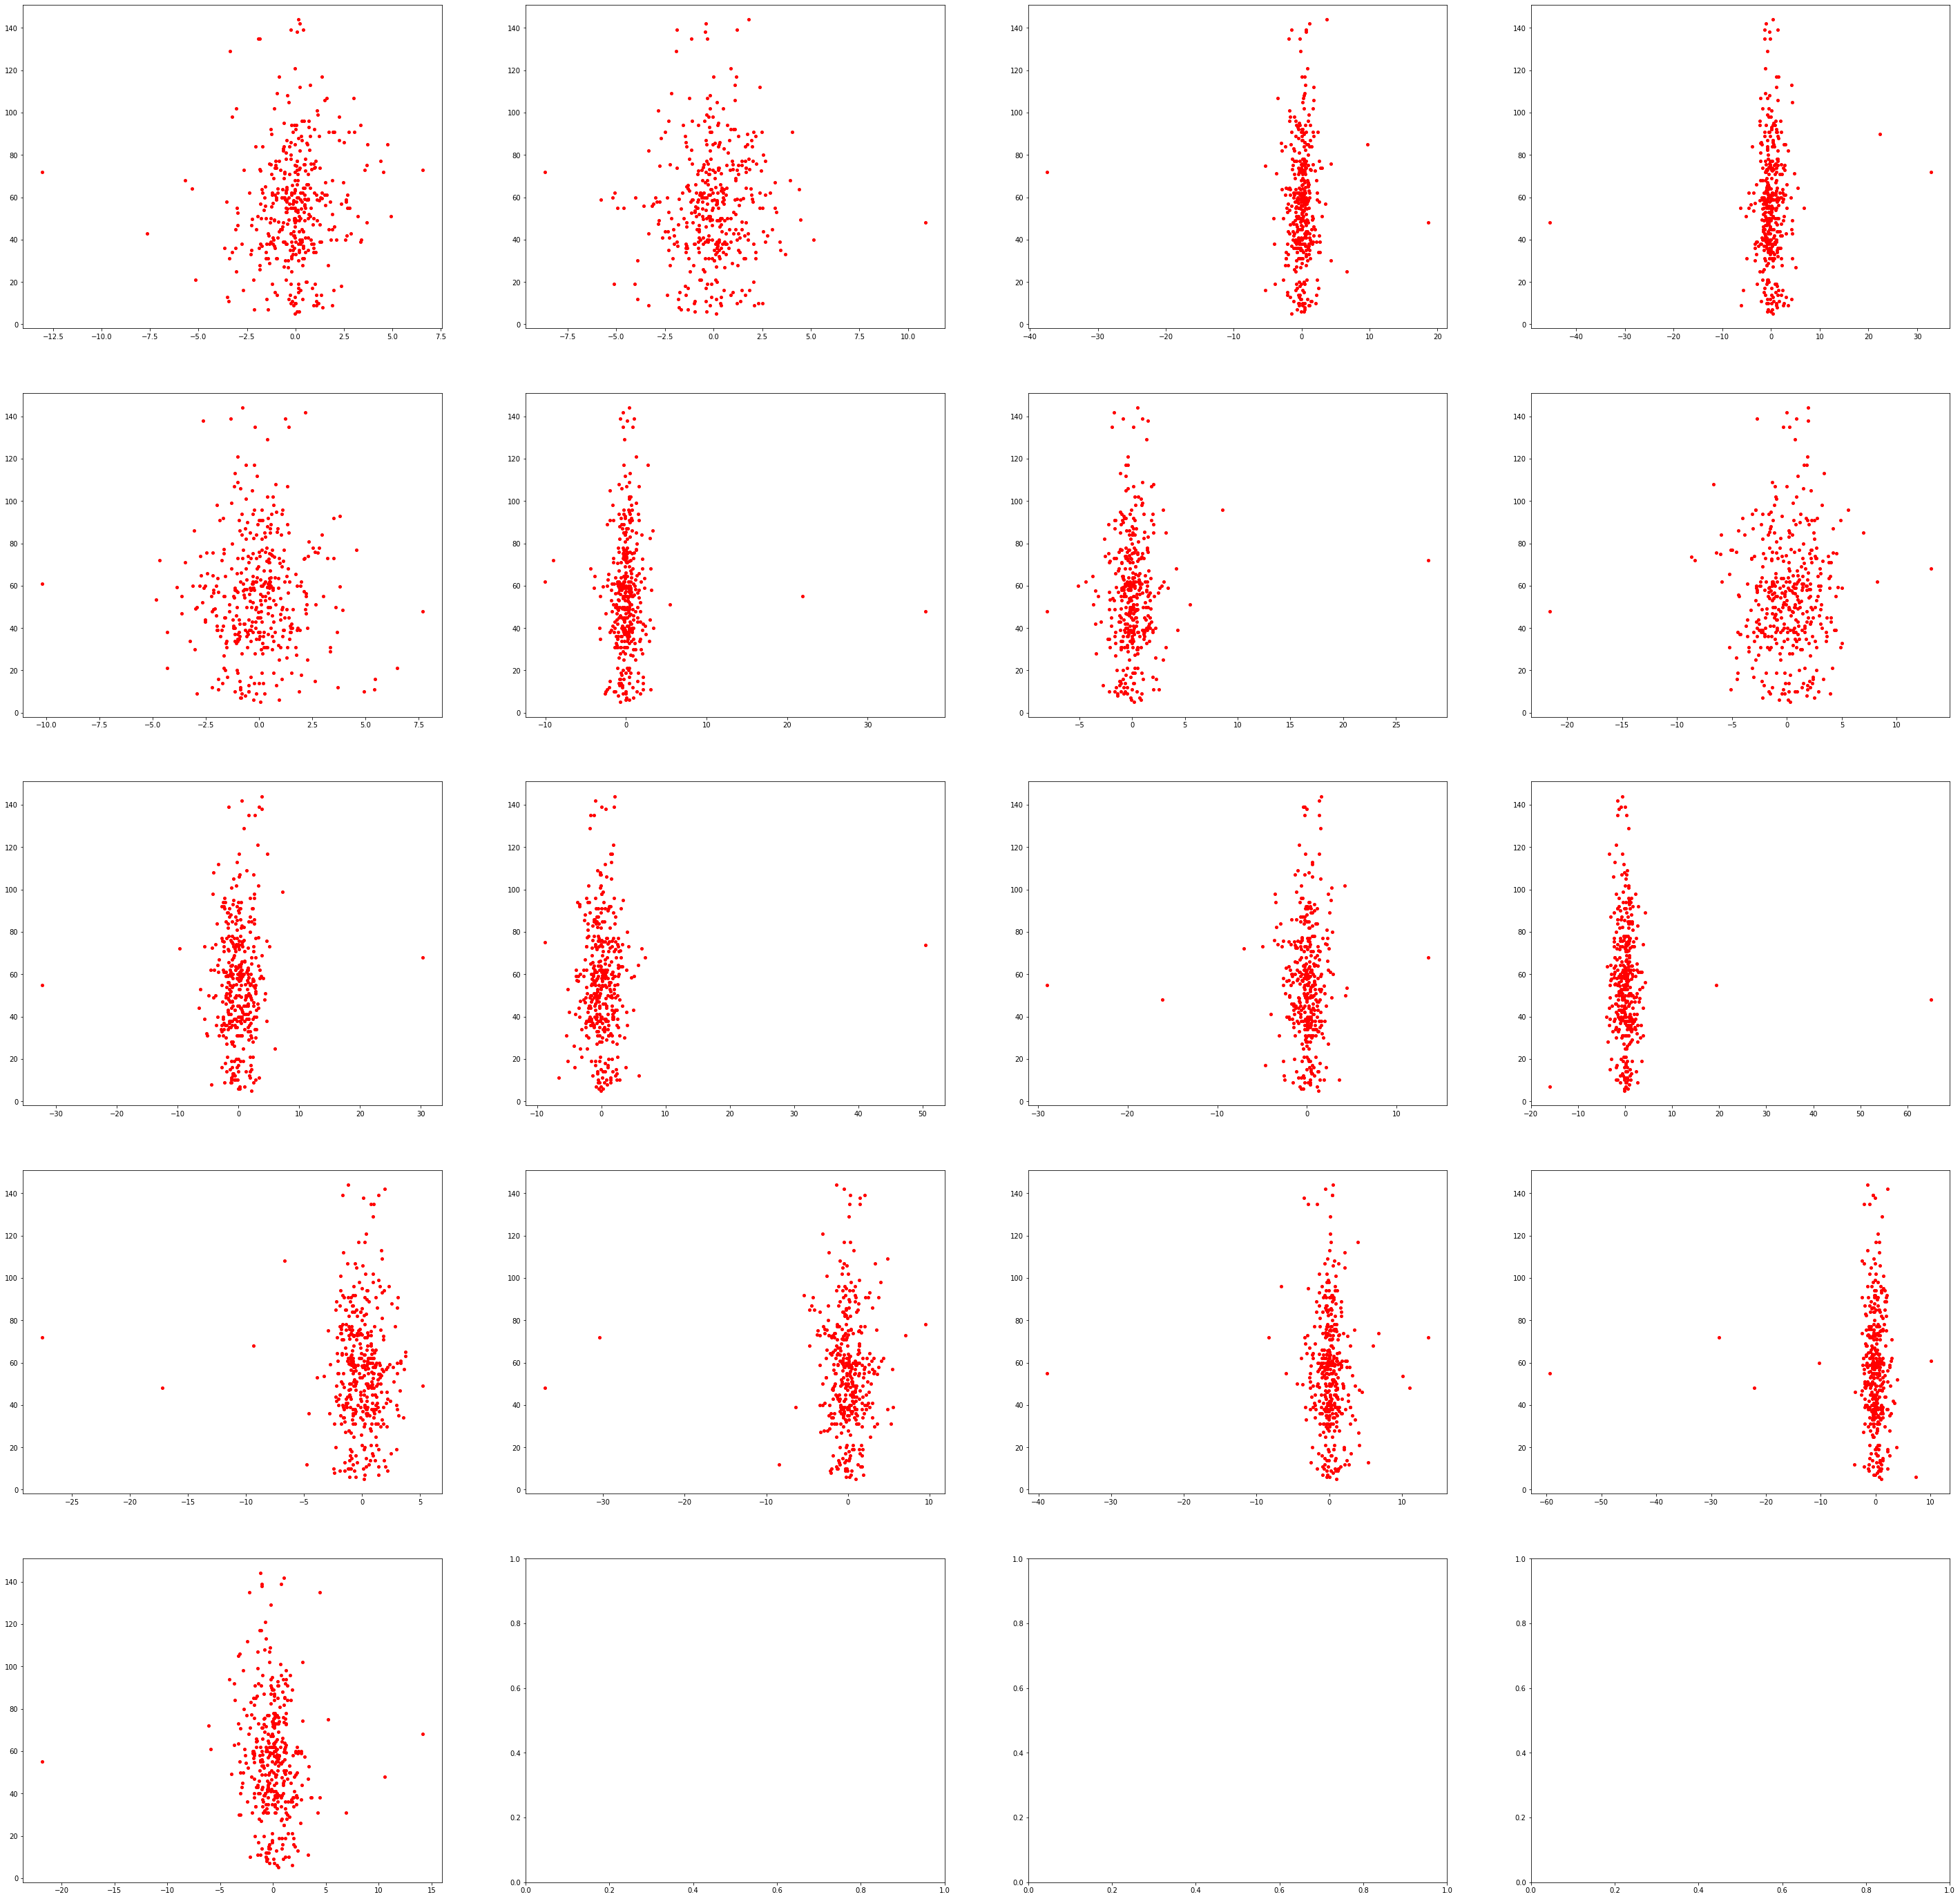

In [228]:
fig, ax = plt.subplots(nrows=len(kendall_sig['index'])//4+1, ncols=4, figsize=(50,50))
fig.subplots_adjust(hspace =.2, wspace=.2)
ax = ax.ravel()
for i, col in enumerate(kendall_sig['index'][1:]):
    ax[i].plot(X_img[col],X_img['RelapseFreeSurvival (outcome)'],'or',markersize = 4)

<h1>Models</h1>

<h2>Random Forest</h2>

In [229]:
X.head()

,TumourStage,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,41.0,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263.0,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670258,0.141574,3.328814,0.725849,-0.425324,0.43

In [230]:
# X = np.array(X.iloc[:,1:])
# y = np.array(y)
# print(X.shape,y.shape)

In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [232]:
print(x_train.shape,y_train.shape)

(320, 117) (320, 1)


In [233]:
# Hyperparameter tuning for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20],
    'max_features': [100, 117],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [10, 20],
    'n_estimators': [600,700]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
rf = grid_search.best_estimator_
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'max_depth': 10, 'max_features': 117, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 600}
17.933115403840677


In [234]:
# Random Forest model
rf = RandomForestRegressor(n_estimators = 600, max_depth = 5, min_samples_leaf = 10, min_samples_split = 10)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, rf_pred)
print(mae)

<ipython-input-234-06e57e9ec368>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


17.824316406341772


In [235]:
feature_list = list(x_train.columns)

In [236]:
# Random Forest feature importance
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(x_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feat_import = pd.DataFrame(feature_importances)
feat_import.head(10)

,0,1
0,original_firstorder_Kurtosis,0.063882
1,original_firstorder_Range,0.057524
2,original_glszm_SizeZoneNonUniformity,0.036069
3,original_firstorder_InterquartileRange,0.028212
4,original_firstorder_90Percentile,0.026088
5,original_firstorder_Maximum,0.024543
6,Age,0.024211
7,original_shape_LeastAxisLength,0.024002
8,original_glszm_ZonePercentage,0.022725
9,original_firstorder_Variance,0.021539


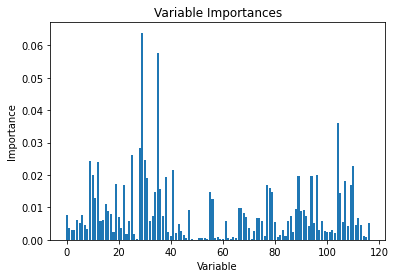

In [237]:
# Plotting the feature importance
import matplotlib.pyplot as plt
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [238]:
from sklearn.metrics import mean_absolute_error 
prediction = rf.predict(x_test)
mae = mean_absolute_error(y_test, prediction)
print(mae)

17.824316406341772


<h2>ANN</h2>

In [239]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x_scaled)
print(x.shape)

(400, 117)


In [240]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [241]:
x_test.shape

(80, 117)

In [242]:
# ANN architecture
model = Sequential([
    
    Dense(units = 240, input_shape = (117,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 480, activation = 'relu'),
    Dense(units = 480, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dense(units = 240, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(units = 120, activation = 'relu'),
    Dense(units = 1, activation = 'relu'),
    
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 240)               28320     
_________________________________________________________________
dropout_16 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 480)               115680    
_________________________________________________________________
dense_51 (Dense)             (None, 480)               230880    
_________________________________________________________________
dense_52 (Dense)             (None, 240)               115440    
_________________________________________________________________
dropout_17 (Dropout)         (None, 240)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 120)              

In [243]:
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_absolute_error')
history = model.fit(x=x_train,y=y_train,epochs=300,verbose=2,validation_split=0.2,batch_size=32)

Epoch 1/300
8/8 - 1s - loss: 391.0931 - val_loss: 190.0287
Epoch 2/300
8/8 - 0s - loss: 188.2787 - val_loss: 1049.0443
Epoch 3/300
8/8 - 0s - loss: 326.0630 - val_loss: 210.6705
Epoch 4/300
8/8 - 0s - loss: 212.5540 - val_loss: 204.1288
Epoch 5/300
8/8 - 0s - loss: 235.5830 - val_loss: 204.2262
Epoch 6/300
8/8 - 0s - loss: 206.3715 - val_loss: 198.5464
Epoch 7/300
8/8 - 0s - loss: 200.7195 - val_loss: 193.0213
Epoch 8/300
8/8 - 0s - loss: 195.2616 - val_loss: 187.6452
Epoch 9/300
8/8 - 0s - loss: 189.9533 - val_loss: 182.4195
Epoch 10/300
8/8 - 0s - loss: 184.8081 - val_loss: 177.3461
Epoch 11/300
8/8 - 0s - loss: 179.8171 - val_loss: 172.4358
Epoch 12/300
8/8 - 0s - loss: 174.9701 - val_loss: 167.6653
Epoch 13/300
8/8 - 0s - loss: 170.2613 - val_loss: 163.0216
Epoch 14/300
8/8 - 0s - loss: 165.6990 - val_loss: 158.5190
Epoch 15/300
8/8 - 0s - loss: 161.2867 - val_loss: 154.1758
Epoch 16/300
8/8 - 0s - loss: 157.0148 - val_loss: 149.9680
Epoch 17/300
8/8 - 0s - loss: 152.8736 - val_los

Epoch 141/300
8/8 - 0s - loss: 23.2913 - val_loss: 23.4332
Epoch 142/300
8/8 - 0s - loss: 23.4502 - val_loss: 22.6620
Epoch 143/300
8/8 - 0s - loss: 23.4902 - val_loss: 22.4860
Epoch 144/300
8/8 - 0s - loss: 23.2417 - val_loss: 22.6494
Epoch 145/300
8/8 - 0s - loss: 23.1795 - val_loss: 22.4198
Epoch 146/300
8/8 - 0s - loss: 23.0413 - val_loss: 22.3345
Epoch 147/300
8/8 - 0s - loss: 23.0564 - val_loss: 21.8417
Epoch 148/300
8/8 - 0s - loss: 23.0408 - val_loss: 22.0145
Epoch 149/300
8/8 - 0s - loss: 22.8760 - val_loss: 22.2437
Epoch 150/300
8/8 - 0s - loss: 22.8657 - val_loss: 22.4354
Epoch 151/300
8/8 - 0s - loss: 22.7841 - val_loss: 22.2257
Epoch 152/300
8/8 - 0s - loss: 22.9454 - val_loss: 22.3900
Epoch 153/300
8/8 - 0s - loss: 22.7088 - val_loss: 22.3309
Epoch 154/300
8/8 - 0s - loss: 22.8422 - val_loss: 21.7970
Epoch 155/300
8/8 - 0s - loss: 22.6092 - val_loss: 21.7261
Epoch 156/300
8/8 - 0s - loss: 22.6838 - val_loss: 22.3206
Epoch 157/300
8/8 - 0s - loss: 22.5353 - val_loss: 21.68

Epoch 280/300
8/8 - 0s - loss: 21.3213 - val_loss: 20.4885
Epoch 281/300
8/8 - 0s - loss: 21.3738 - val_loss: 20.9781
Epoch 282/300
8/8 - 0s - loss: 21.3432 - val_loss: 20.6938
Epoch 283/300
8/8 - 0s - loss: 21.3482 - val_loss: 20.8004
Epoch 284/300
8/8 - 0s - loss: 21.3244 - val_loss: 20.5269
Epoch 285/300
8/8 - 0s - loss: 21.3972 - val_loss: 20.4979
Epoch 286/300
8/8 - 0s - loss: 21.3675 - val_loss: 21.1305
Epoch 287/300
8/8 - 0s - loss: 21.4569 - val_loss: 20.6924
Epoch 288/300
8/8 - 0s - loss: 21.3141 - val_loss: 21.0777
Epoch 289/300
8/8 - 0s - loss: 21.5092 - val_loss: 20.4879
Epoch 290/300
8/8 - 0s - loss: 21.3126 - val_loss: 21.2772
Epoch 291/300
8/8 - 0s - loss: 21.3323 - val_loss: 21.1159
Epoch 292/300
8/8 - 0s - loss: 21.3237 - val_loss: 21.3842
Epoch 293/300
8/8 - 0s - loss: 21.3587 - val_loss: 21.3537
Epoch 294/300
8/8 - 0s - loss: 21.4269 - val_loss: 20.8886
Epoch 295/300
8/8 - 0s - loss: 21.3457 - val_loss: 20.7430
Epoch 296/300
8/8 - 0s - loss: 21.3348 - val_loss: 21.26

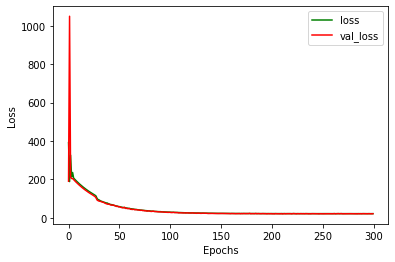

In [244]:
# Loss vs Epochs plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,300)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [245]:
model.evaluate(x=x_test,y=y_test)
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 4ms/step - loss: 19.3903


In [246]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

19.37814604441325


In [247]:
model.save('saved_model/best_model_aucc82')

INFO:tensorflow:Assets written to: saved_model/best_model_aucc82\assets


<h1>Saving model objects to run on test</h1>

In [248]:
import pickle

# save the imputer to disk
filename = 'saved_model/float_cols_imputer.sav'
pickle.dump(sif, open(filename, 'wb'))


filename = 'saved_model/int_cols_imputer.sav'
pickle.dump(sic, open(filename, 'wb'))


# save the transformer to disk
filename = 'saved_model/robust_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

# save the scaler to disk
filename = 'saved_model/min_max_scaler.sav'
pickle.dump(min_max_scaler, open(filename, 'wb'))

# Continuous columns list
filename = 'saved_model/continuous_features.pkl'
pickle.dump({'continuous_features':float_cols}, open(filename, 'wb'))

# Categorical columns
filename = 'saved_model/categorical_features.pkl'
pickle.dump({'categorical_features':cat_cols}, open(filename, 'wb'))

